In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

In [110]:
# Load data
data = pd.read_csv('/Users/niklasquendt/Documents/Uni/PSDA/teco-psda-exercisesheet1-employment-2024/employment_train.csv')
print(data.head())

   Unnamed: 0  age  race earnwke  employed  unemployed  married  union  \
0           0   53     1     NaN         1           0        1      0   
1           1   39     1     NaN         1           0        1      0   
2           2   41     1     500         1           0        1      0   
3           3   27     1     520         1           0        1      0   
4           4   29     3     615         1           0        0      0   

   ne_states  so_states  ...  government  private  self  educ_lths  educ_hs  \
0          0          0  ...           0        0     1          0        0   
1          0          0  ...           0        0     1          0        0   
2          0          1  ...           0        1     0          0        0   
3          0          1  ...           0        1     0          1        0   
4          0          1  ...           1        0     0          0        0   

   educ_somecol  educ_aa  educ_bac  educ_adv  female  
0             1        0 

In [111]:
# Preprocess data
# Fill missing values
data = data.fillna(method='ffill')
print(data.isnull().sum())


Unnamed: 0      0
age             0
race            0
earnwke         2
employed        0
unemployed      0
married         0
union           0
ne_states       0
so_states       0
ce_states       0
we_states       0
government      0
private         0
self            0
educ_lths       0
educ_hs         0
educ_somecol    0
educ_aa         0
educ_bac        0
educ_adv        0
female          0
dtype: int64


In [112]:
# Convert categorical variables to numerical
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])


In [113]:
features = ['age', 'race', 'earnwke', 'employed', 'unemployed', 'married', 'union', 'ne_states', 'so_states', 'ce_states',	'we_states'	,'government',	'private',	'self',	'educ_lths',	'educ_hs',	'educ_somecol',	'educ_aa',	'educ_bac',	'educ_adv',	'female']

X = data[features]
y = data['employed']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

# Train decision tree classifier with pruning
dtree = DecisionTreeClassifier(ccp_alpha=0.6)
dtree = dtree.fit(X_train, y_train)

# Validate the model
accuracyval = dtree.score(X_val, y_val)
accuracytrain = dtree.score(X_train, y_train)
print("Validation accuracy:", accuracyval)
print("Training accuracy:", accuracytrain)

 

Training data shape: (4169, 21)
Validation data shape: (1043, 21)
Validation accuracy: 0.8897411313518696
Training accuracy: 0.889901655073159


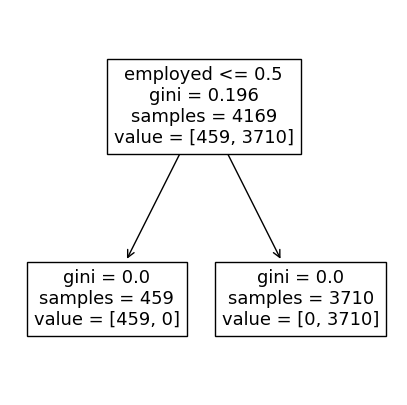

In [114]:

# Train decision tree classifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

# Plot decision tree
plt.figure(figsize=(5,5))
tree.plot_tree(dtree, feature_names=features)
plt.show()

In [119]:
""" # Lade den Testdatensatz
test_data = pd.read_csv('/Users/niklasquendt/Documents/Uni/PSDA/teco-psda-exercisesheet1-employment-2024/employment_test.csv')
print(test_data.head())

# Fülle fehlende Werte auf ähnliche Weise wie im Trainingsdatensatz
test_data = test_data.fillna(method='ffill')

# Wandle kategorische Variablen in numerische um
# Preprocess test data
data_test = data_test.fillna(method='ffill')
for column in data_test.columns:
    if data_test[column].dtype == object:
        # Replace unseen labels with a common value
        data_test[column] = data_test[column].map(lambda s: 'unknown' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, 'unknown')
        data_test[column] = le.transform(data_test[column])
        
# Extrahiere Features und Labels
X_test = test_data[features]

# Mache Vorhersagen für 'employed' und 'unemployed'
predictions = dtree.predict(X_test)

# Füge die Vorhersagen zum Testdatensatz hinzu
test_data['predicted_employed'] = predictions
test_data['predicted_unemployed'] = 1 - predictions  # Da 'employed' und 'unemployed' sich ergänzen

# Zeige den Testdatensatz mit Vorhersagen an
print(test_data[['employed', 'unemployed', 'predicted_employed', 'predicted_unemployed']])

"""

" # Lade den Testdatensatz\ntest_data = pd.read_csv('/Users/niklasquendt/Documents/Uni/PSDA/teco-psda-exercisesheet1-employment-2024/employment_test.csv')\nprint(test_data.head())\n\n# Fülle fehlende Werte auf ähnliche Weise wie im Trainingsdatensatz\ntest_data = test_data.fillna(method='ffill')\n\n# Wandle kategorische Variablen in numerische um\n# Preprocess test data\ndata_test = data_test.fillna(method='ffill')\nfor column in data_test.columns:\n    if data_test[column].dtype == object:\n        # Replace unseen labels with a common value\n        data_test[column] = data_test[column].map(lambda s: 'unknown' if s not in le.classes_ else s)\n        le.classes_ = np.append(le.classes_, 'unknown')\n        data_test[column] = le.transform(data_test[column])\n        \n# Extrahiere Features und Labels\nX_test = test_data[features]\n\n# Mache Vorhersagen für 'employed' und 'unemployed'\npredictions = dtree.predict(X_test)\n\n# Füge die Vorhersagen zum Testdatensatz hinzu\ntest_data['pr

Predictions on test data:
[[1 0]
 [1 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 1]]


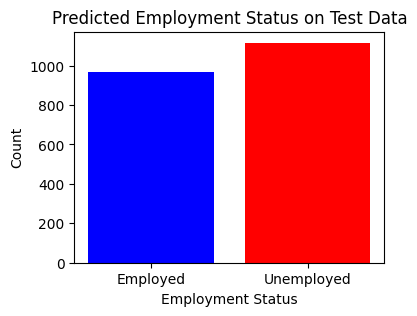

In [121]:
#test model and Predictions
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

# Load data
data_test = pd.read_csv('/Users/niklasquendt/Documents/Uni/PSDA/teco-psda-exercisesheet1-employment-2024/employment_test.csv')


# Preprocess test data
data_test = data_test.fillna(method='ffill')
for column in data_test.columns:
    if data_test[column].dtype == object:
        # Replace unseen labels with a common value
        data_test[column] = data_test[column].map(lambda s: 'unknown' if s not in le.classes_ else s)
        le.classes_ = np.append(le.classes_, 'unknown')
        data_test[column] = le.transform(data_test[column])

features = ['age', 'race', 'earnwke', 'employed', 'unemployed', 'married', 'union', 'ne_states', 'so_states', 'ce_states',	'we_states'	,'government',	'private',	'self',	'educ_lths',	'educ_hs',	'educ_somecol',	'educ_aa',	'educ_bac',	'educ_adv',	'female']

# Split data into features and target
# 'employed' and 'unemployed' are the target variables
X = data.drop(['employed', 'unemployed'], axis=1)
y = data[['employed', 'unemployed']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

# Make predictions on test data
predictions = dtree.predict(X_test)

# Print predictions
print("Predictions on test data:")
print(predictions)

# Count the number of employed and unemployed predictions
employed_count = (predictions_employed == 1).sum()
unemployed_count = (predictions_unemployed == 1).sum()

# Plot a bar chart
labels = ['Employed', 'Unemployed']
counts = [employed_count, unemployed_count]

plt.figure(figsize=(4, 3))
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Predicted Employment Status on Test Data')
plt.show()


Predictions for 'employed' on test data:
[[1 0]
 [1 0]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 1]]

Predictions for 'unemployed' on test data:
[[0 1]
 [0 1]
 [1 1]
 ...
 [0 1]
 [1 1]
 [1 0]]


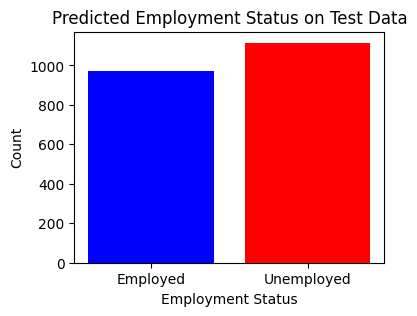

In [122]:

# Split data into features and target
# 'employed' and 'unemployed' are the target variables
X = data.drop(['employed', 'unemployed'], axis=1)
y = data[['employed', 'unemployed']]
# Make predictions on test data
predictions_employed = dtree.predict(X_test)
predictions_unemployed = 1 - predictions_employed  # Since employed + unemployed = 1

# Print predictions
print("Predictions for 'employed' on test data:")
print(predictions_employed)

print("\nPredictions for 'unemployed' on test data:")
print(predictions_unemployed)

#import matplotlib.pyplot as plt

# Count the number of employed and unemployed predictions
employed_count = (predictions_employed == 1).sum()
unemployed_count = (predictions_unemployed == 1).sum()

# Plot a bar chart
labels = ['Employed', 'Unemployed']
counts = [employed_count, unemployed_count]

plt.figure(figsize=(4, 3))
plt.bar(labels, counts, color=['blue', 'red'])
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Predicted Employment Status on Test Data')
plt.show()